In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data = pd.read_csv('income_evaluation.csv', sep=',')
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


NaN и потенциально неинформативных признаков нет

In [31]:
#используем LabelEncoder, чтобы построить тепловую карту корреляции для всех признаков,
#т.к. object не обрабатывается
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
obj = data #сохраняем значение столбцов object, кроме целевого признака
for y in data.columns:
    if(data[y].dtype == object):
        data[y]= label.fit_transform(data[y]) 
    else:
        obj = obj.drop(y, axis='columns')
obj = obj.drop([' income'], axis='columns')
obj.head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


<AxesSubplot:>

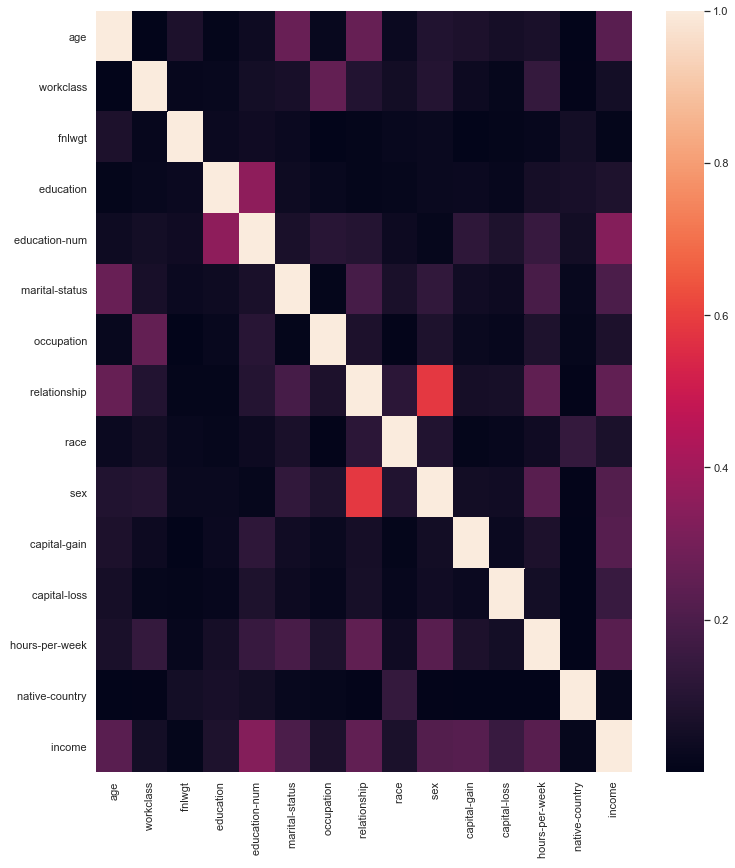

In [32]:
import seaborn as sns #библиотека для отрисовки картинки
corr = data.corr().abs() #модуль от корреляции
sns.set(rc={'figure.figsize':(12,14)})
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values) #рисуем

Тепловая карта показывает насколь признаки коррелируют друг с другом (линейно зависимы)
В нашем случае высоко-коррелируемых признаков нет

Проверка на анамольные значения:

<AxesSubplot:>

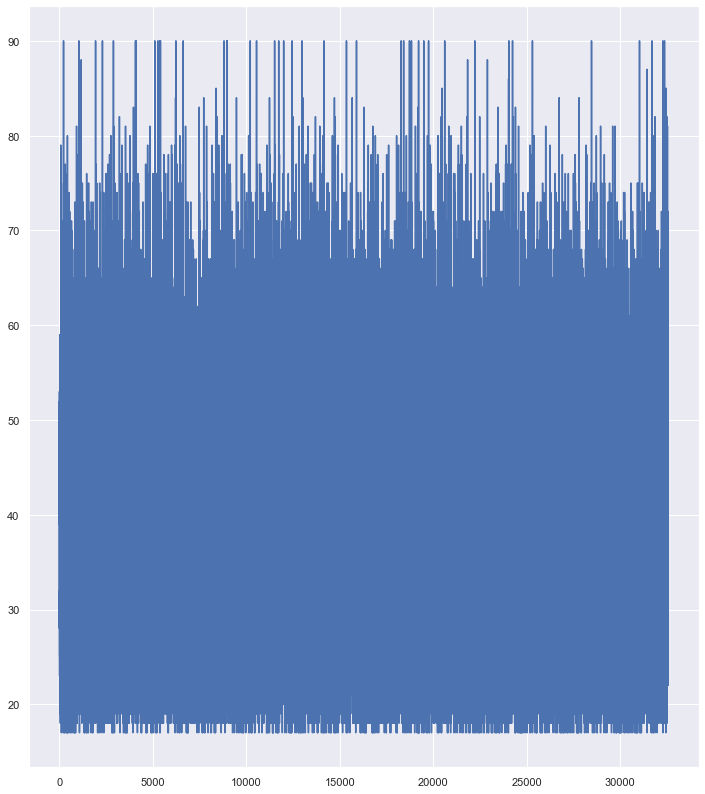

In [33]:
data['age'].plot()

<AxesSubplot:>

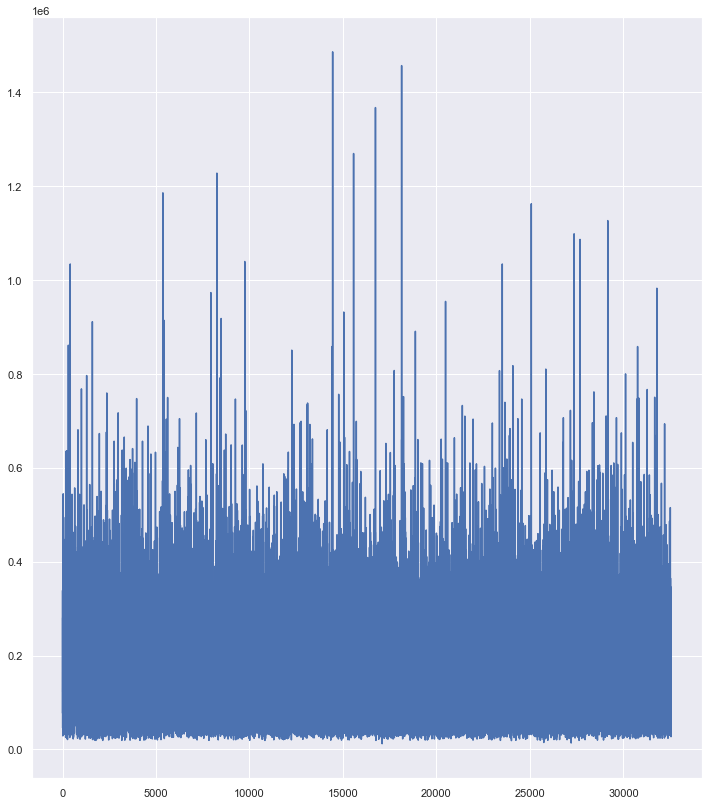

In [34]:
data[' fnlwgt'].plot()

<AxesSubplot:>

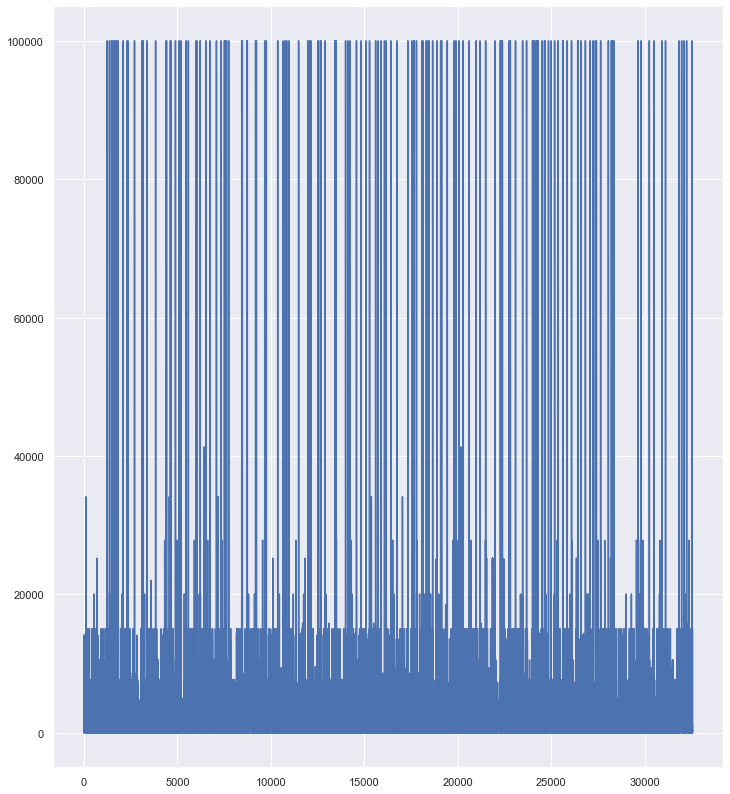

In [35]:
data[' capital-gain'].plot()

<AxesSubplot:>

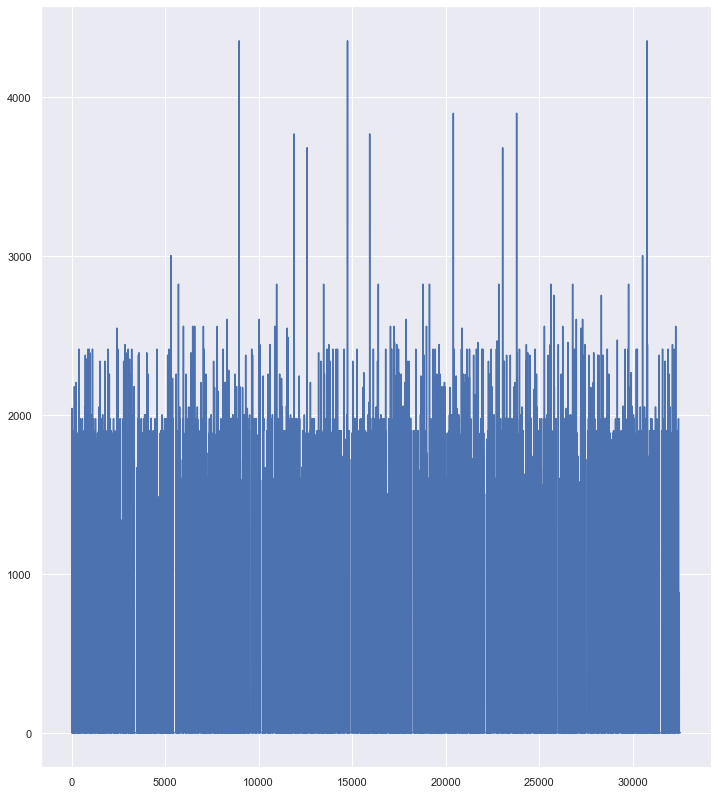

In [36]:
data[' capital-loss'].plot()

<AxesSubplot:>

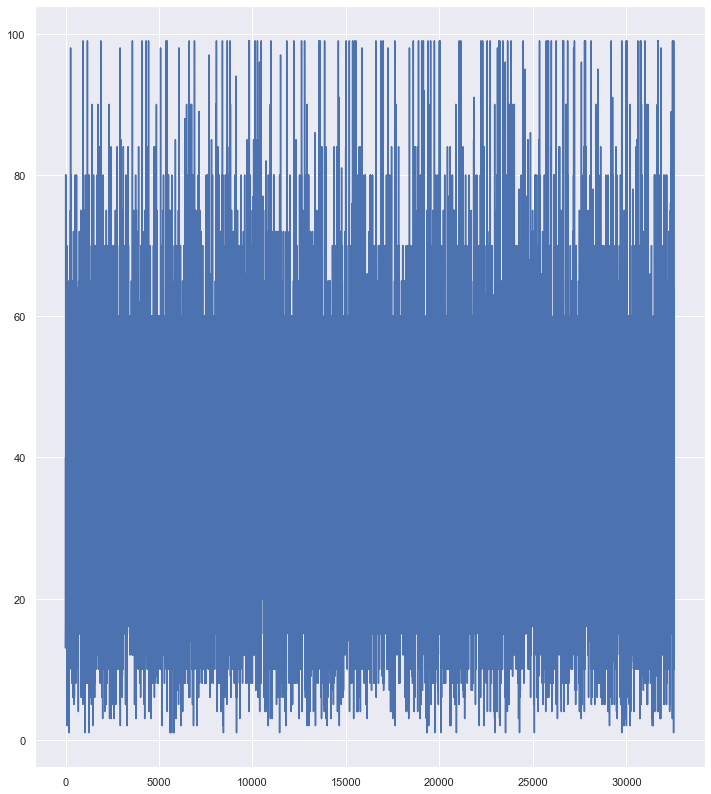

In [37]:
data[' hours-per-week'].plot()

Анамольных значений нет

Посмотрим распределение признаков, для того, чтобы избавится от признаков, значение которых одинаково для большенства объектов

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':' workclass'}>,
        <AxesSubplot:title={'center':' fnlwgt'}>,
        <AxesSubplot:title={'center':' education'}>],
       [<AxesSubplot:title={'center':' education-num'}>,
        <AxesSubplot:title={'center':' marital-status'}>,
        <AxesSubplot:title={'center':' occupation'}>,
        <AxesSubplot:title={'center':' relationship'}>],
       [<AxesSubplot:title={'center':' race'}>,
        <AxesSubplot:title={'center':' sex'}>,
        <AxesSubplot:title={'center':' capital-gain'}>,
        <AxesSubplot:title={'center':' capital-loss'}>],
       [<AxesSubplot:title={'center':' hours-per-week'}>,
        <AxesSubplot:title={'center':' native-country'}>,
        <AxesSubplot:title={'center':' income'}>, <AxesSubplot:>]],
      dtype=object)

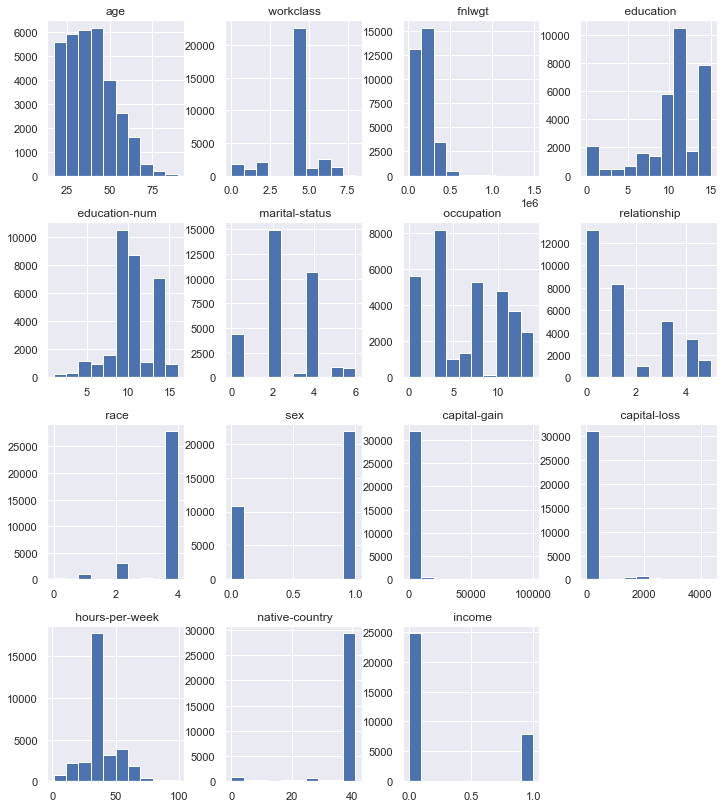

In [38]:
#for columns in data:
 #   data[columns].hist()
   # fig = h.get_figure()
data.hist()

In [39]:
np.corrcoef(data[' workclass'], data[' income'])

array([[1.        , 0.05160427],
       [0.05160427, 1.        ]])

In [40]:
np.corrcoef(data[' race'], data[' income'])

array([[1.        , 0.07184561],
       [0.07184561, 1.        ]])

In [41]:
np.corrcoef(data[' capital-gain'], data[' income'])

array([[1.        , 0.22332882],
       [0.22332882, 1.        ]])

In [42]:
np.corrcoef(data[' capital-loss'], data[' income'])

array([[1.        , 0.15052631],
       [0.15052631, 1.        ]])

In [43]:
np.corrcoef(data[' hours-per-week'], data[' income'])

array([[1.        , 0.22968907],
       [0.22968907, 1.        ]])

In [44]:
np.corrcoef(data[' native-country'], data[' income'])

array([[1.        , 0.01584026],
       [0.01584026, 1.        ]])

In [45]:
data = data.drop([' workclass', ' race', ' capital-loss', ' native-country'], axis='columns')
data.head(10)

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,hours-per-week,income
0,39,77516,9,13,4,1,1,1,2174,40,0
1,50,83311,9,13,2,4,0,1,0,13,0
2,38,215646,11,9,0,6,1,1,0,40,0
3,53,234721,1,7,2,6,0,1,0,40,0
4,28,338409,9,13,2,10,5,0,0,40,0
5,37,284582,12,14,2,4,5,0,0,40,0
6,49,160187,6,5,3,8,1,0,0,16,0
7,52,209642,11,9,2,4,0,1,0,45,1
8,31,45781,12,14,4,10,1,0,14084,50,1
9,42,159449,9,13,2,4,0,1,5178,40,1


In [46]:
#возвращаем значение столбцов
for y in obj.columns:
    if y in data.columns:
        data[y] = obj[y]
data.head(10)

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,hours-per-week,income
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,40,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,13,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,40,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,40,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,40,0
5,37,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,40,0
6,49,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,16,0
7,52,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,45,1
8,31,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,50,1
9,42,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,40,1


In [47]:
#используем one_hot для того, чтобы модель не пыталась найти закономерность в числах - классах
for y in data.columns:
    if(data[y].dtype == object):
        one_hot = pd.get_dummies(data[y])
        data = data.drop(y,axis = 1)
        data = data.join(one_hot)
data.head(10)

,age,fnlwgt,education-num,capital-gain,hours-per-week,income,10th,11th,12th,1st-4th,...,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Female,Male
0,39,77516,13,2174,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,50,83311,13,0,13,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,38,215646,9,0,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,53,234721,7,0,40,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,28,338409,13,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,37,284582,14,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,49,160187,5,0,16,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,52,209642,9,0,45,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,31,45781,14,14084,50,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,42,159449,13,5178,40,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     32561 non-null  int64
 1    fnlwgt                 32561 non-null  int64
 2    education-num          32561 non-null  int64
 3    capital-gain           32561 non-null  int64
 4    hours-per-week         32561 non-null  int64
 5    income                 32561 non-null  int32
 6    10th                   32561 non-null  uint8
 7    11th                   32561 non-null  uint8
 8    12th                   32561 non-null  uint8
 9    1st-4th                32561 non-null  uint8
 10   5th-6th                32561 non-null  uint8
 11   7th-8th                32561 non-null  uint8
 12   9th                    32561 non-null  uint8
 13   Assoc-acdm             32561 non-null  uint8
 14   Assoc-voc              32561 non-null  uint8
 15   Bachelors         

In [49]:
#удаляем неинформативный столбец
data = data.drop([' ?'], axis='columns')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     32561 non-null  int64
 1    fnlwgt                 32561 non-null  int64
 2    education-num          32561 non-null  int64
 3    capital-gain           32561 non-null  int64
 4    hours-per-week         32561 non-null  int64
 5    income                 32561 non-null  int32
 6    10th                   32561 non-null  uint8
 7    11th                   32561 non-null  uint8
 8    12th                   32561 non-null  uint8
 9    1st-4th                32561 non-null  uint8
 10   5th-6th                32561 non-null  uint8
 11   7th-8th                32561 non-null  uint8
 12   9th                    32561 non-null  uint8
 13   Assoc-acdm             32561 non-null  uint8
 14   Assoc-voc              32561 non-null  uint8
 15   Bachelors         

In [54]:
X = data
X = X.drop([' income'], axis='columns')
y = data[' income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24420 entries, 23371 to 25783
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     24420 non-null  int64
 1    fnlwgt                 24420 non-null  int64
 2    education-num          24420 non-null  int64
 3    capital-gain           24420 non-null  int64
 4    hours-per-week         24420 non-null  int64
 5    10th                   24420 non-null  uint8
 6    11th                   24420 non-null  uint8
 7    12th                   24420 non-null  uint8
 8    1st-4th                24420 non-null  uint8
 9    5th-6th                24420 non-null  uint8
 10   7th-8th                24420 non-null  uint8
 11   9th                    24420 non-null  uint8
 12   Assoc-acdm             24420 non-null  uint8
 13   Assoc-voc              24420 non-null  uint8
 14   Bachelors              24420 non-null  uint8
 15   Doctorate     

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7671047782827662

Выполнено 1 из 41
Выполнено 2 из 41
Выполнено 3 из 41
Выполнено 4 из 41
Выполнено 5 из 41
Выполнено 6 из 41
Выполнено 7 из 41
Выполнено 8 из 41
Выполнено 9 из 41
Выполнено 10 из 41
Выполнено 11 из 41
Выполнено 12 из 41
Выполнено 13 из 41
Выполнено 14 из 41
Выполнено 15 из 41
Выполнено 16 из 41
Выполнено 17 из 41
Выполнено 18 из 41
Выполнено 19 из 41
Выполнено 20 из 41
Выполнено 21 из 41
Выполнено 22 из 41
Выполнено 23 из 41
Выполнено 24 из 41
Выполнено 25 из 41
Выполнено 26 из 41
Выполнено 27 из 41
Выполнено 28 из 41
Выполнено 29 из 41
Выполнено 30 из 41
Выполнено 31 из 41
Выполнено 32 из 41
Выполнено 33 из 41
Выполнено 34 из 41
Выполнено 35 из 41
Выполнено 36 из 41
Выполнено 37 из 41
Выполнено 38 из 41
Выполнено 39 из 41
Выполнено 40 из 41


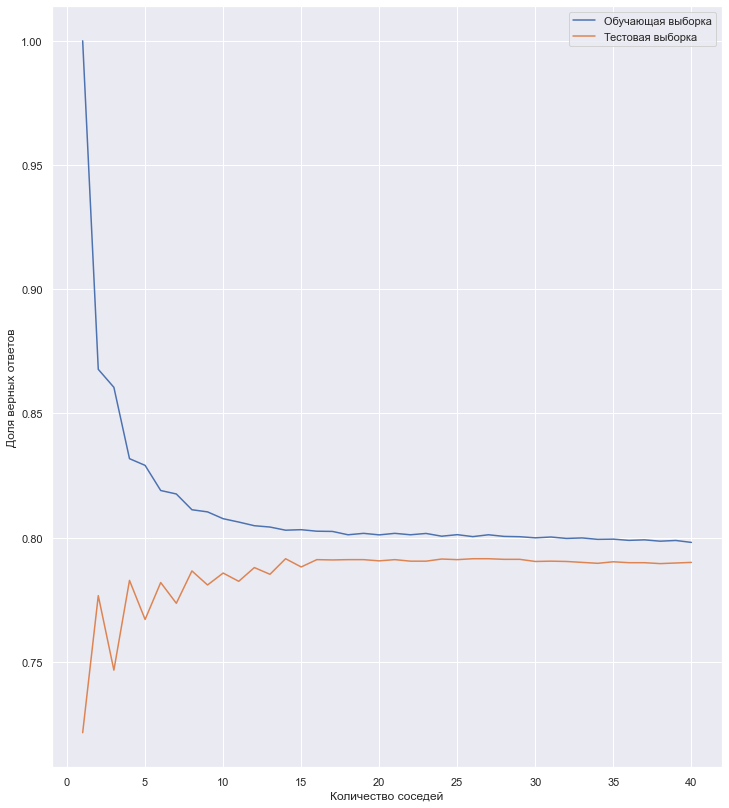

In [57]:
train_scores = {}
test_scores = {}
for n in range(1,41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score
    print('Выполнено', n, 'из 41')
plt.plot(train_scores.keys(), train_scores.values(), label='Обучающая выборка')
plt.plot(test_scores.keys(), test_scores.values(), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

т.к. грфики примерно параллельны, модель не переобучилась